# Dia 1 - Coleta de dados

---

#### Importando o Pandas

In [2]:
import pandas as pd

## Coletando dados

Crio um dataframe vazio com os nomes das colunas

In [3]:
pd.read_csv('/home/matheus/projetos/7DaysOfCode/pandas/dados_emprestimos/emprestimos-20101.csv').columns

Index(['id_emprestimo', 'codigo_barras', 'data_renovacao', 'data_emprestimo',
       'data_devolucao', 'matricula_ou_siape', 'tipo_vinculo_usuario'],
      dtype='object')

In [4]:
emprestimos = pd.DataFrame(columns= ['id_emprestimo', 'codigo_barras', 'data_renovacao', 'data_emprestimo',
       'data_devolucao', 'matricula_ou_siape', 'tipo_vinculo_usuario'])
emprestimos

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario


Faço um loop `for` para me ajudar a unificar todos os arquivos csv

In [5]:
import os

# Diretório onde os arquivos CSV estão localizados
diretorio_emprestimos = '/home/matheus/projetos/7DaysOfCode/pandas/dados_emprestimos/'

# Loop através dos anos e partes
for ano in range(2010, 2021):
    for parte in range(1,3):
        # Crie o caminho para o arquivo CSV
        caminho_arquivo = os.path.join(diretorio_emprestimos, f'emprestimos-{ano}{parte}.csv')
        
        # Verifique se o arquivo existe antes de ler
        if os.path.isfile(caminho_arquivo):
            
            # Leia o CSV e adicione-o ao DataFrame
            df = pd.read_csv(caminho_arquivo)
            emprestimos = emprestimos.merge(pd.read_csv(f'/home/matheus/projetos/7DaysOfCode/pandas/dados_emprestimos/emprestimos-{ano}{parte}.csv'), how= 'outer')

emprestimos.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO
1,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO
2,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO
3,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO
4,709686,2006017618,2010/01/26 08:07:01.738000000,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2.008112e+09,ALUNO DE PÓS-GRADUAÇÃO


Crio um unico dataframe mesclando os emprestimos do acervo com o arquivo de exemplares do acervo

In [6]:
dados = emprestimos.merge(pd.read_parquet('/home/matheus/projetos/7DaysOfCode/pandas/dados_exemplares.parquet'), on='codigo_barras')

dados.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,registro_sistema
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,4225
1,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,4225
2,726965,L095049,2010/03/31 12:41:08.684000000,2010/03/01 12:40:56.212000000,2010/04/30 14:42:35.366000000,2.009122e+09,ALUNO DE PÓS-GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,4225
3,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009
4,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009


## Limpeza de dados duplicados

In [7]:
dados.drop_duplicates(inplace= True)

# Dia 2: As primeiras manipulações

---

## Atribuir a uma nova coluna a nomenclatura da CDU

Primeiro crio um dicionário informando a localização com as respectivas classes da CDU

In [8]:
mapa = {range(0, 100): 'Generalidades. Ciência e conhecimento',
        range(100, 200): 'Filosofia e psicologia',
        range(200, 300): 'Religião',
        range(300, 400): 'Ciências sociais',
        range(400, 500): 'Classe vaga',
        range(500, 600): 'Matemática e ciências naturais',
        range(600, 700): 'Ciências aplicadas',
        range(700, 800): 'Belas artes',
        range(800, 900): 'Linguagem. Língua. Linguística',
        range(900, 1000): 'Geografia. Biografia. História'}

Em seguida crio a nova coluna com os dados de localização e utilizo o mapa para alterar seus valores 

In [9]:
dados['classe_geral'] = dados['localizacao'].replace(mapa)
dados.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,registro_sistema,classe_geral
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,4225,Ciências aplicadas
2,726965,L095049,2010/03/31 12:41:08.684000000,2010/03/01 12:40:56.212000000,2010/04/30 14:42:35.366000000,2.009122e+09,ALUNO DE PÓS-GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,4225,Ciências aplicadas
3,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009,Ciências aplicadas
5,717763,L167050,NaN,2010/02/11 11:16:30.335000000,2010/03/04 08:54:32.262000000,2.008050e+09,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009,Ciências aplicadas
6,729996,L167050,2010/03/17 09:08:26.874000000,2010/03/04 13:36:26.599000000,2010/03/31 18:04:29.669000000,2.007226e+08,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009,Ciências aplicadas


## Excluindo a coluna "registro_sistema"

In [10]:
dados.drop('registro_sistema', axis= 1, inplace= True)

dados.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,classe_geral
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências aplicadas
2,726965,L095049,2010/03/31 12:41:08.684000000,2010/03/01 12:40:56.212000000,2010/04/30 14:42:35.366000000,2.009122e+09,ALUNO DE PÓS-GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências aplicadas
3,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas
5,717763,L167050,NaN,2010/02/11 11:16:30.335000000,2010/03/04 08:54:32.262000000,2.008050e+09,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas
6,729996,L167050,2010/03/17 09:08:26.874000000,2010/03/04 13:36:26.599000000,2010/03/31 18:04:29.669000000,2.007226e+08,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas


## Modificando tipo de dado da coluna "matricula_ou_siape"

In [11]:
dados['matricula_ou_siape'] = dados['matricula_ou_siape'].astype(str)
dados.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,classe_geral
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2008023265.0,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências aplicadas
2,726965,L095049,2010/03/31 12:41:08.684000000,2010/03/01 12:40:56.212000000,2010/04/30 14:42:35.366000000,2009121584.0,ALUNO DE PÓS-GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências aplicadas
3,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2008023265.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas
5,717763,L167050,NaN,2010/02/11 11:16:30.335000000,2010/03/04 08:54:32.262000000,2008050352.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas
6,729996,L167050,2010/03/17 09:08:26.874000000,2010/03/04 13:36:26.599000000,2010/03/31 18:04:29.669000000,200722565.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas


# Dia 3: Explorando o Datetime dos dados

---

## Transformação dos tipos de dados

In [12]:
dados['data_devolucao'] = pd.to_datetime(dados['data_devolucao'])
dados['data_emprestimo'] = pd.to_datetime(dados['data_emprestimo'])
dados['data_renovacao'] = pd.to_datetime(dados['data_renovacao'])

Verifico a transformação

In [13]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2072522 entries, 0 to 2072557
Data columns (total 13 columns):
 #   Column                Dtype         
---  ------                -----         
 0   id_emprestimo         int64         
 1   codigo_barras         object        
 2   data_renovacao        datetime64[ns]
 3   data_emprestimo       datetime64[ns]
 4   data_devolucao        datetime64[ns]
 5   matricula_ou_siape    object        
 6   tipo_vinculo_usuario  object        
 7   id_exemplar           int64         
 8   colecao               object        
 9   biblioteca            object        
 10  status_material       object        
 11  localizacao           int64         
 12  classe_geral          object        
dtypes: datetime64[ns](3), int64(3), object(7)
memory usage: 221.4+ MB


## Quantidade de exemplares emprestados por ano

Crio uma nova variavel copiando o dataframe `dados`

Em seguida faço filtragem

In [14]:
emprestimos_ano = dados.copy()
emprestimos_ano['data_emprestimo'] = emprestimos_ano['data_emprestimo'].dt.year
emprestimos_ano = emprestimos_ano.groupby('data_emprestimo')['id_exemplar'].count().to_frame()
emprestimos_ano.head()

,id_exemplar
data_emprestimo,
2010,161394
2011,196390
2012,221365
2013,234749
2014,219189


Ploto o grafico da tabela acima

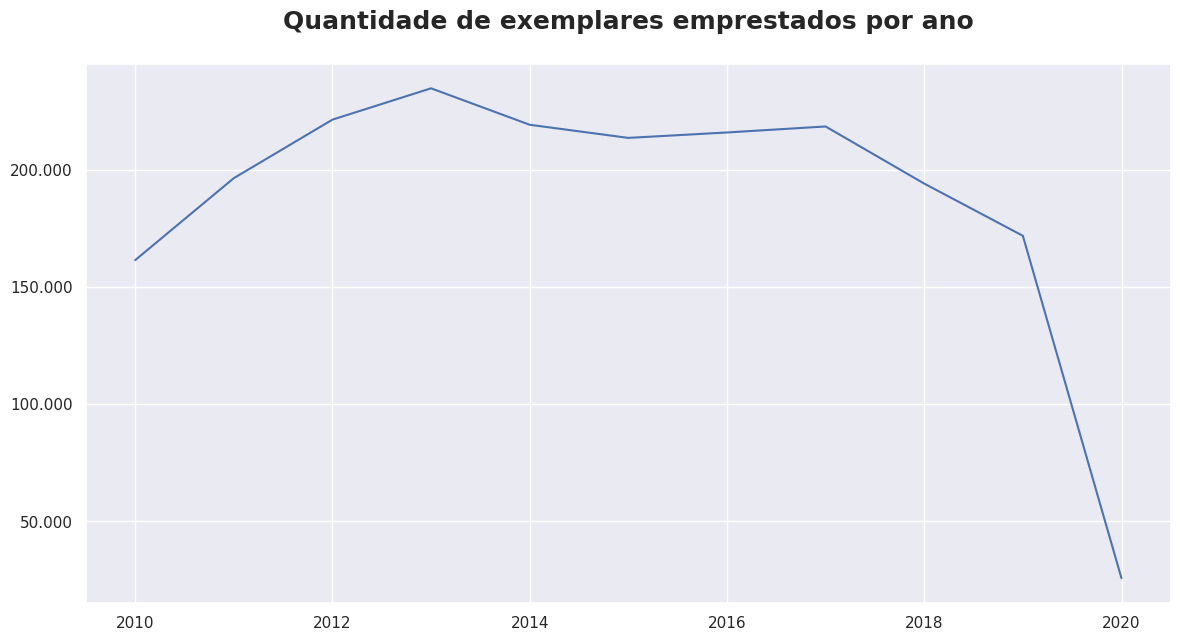

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

sns.set_theme(context='notebook', 
              style='darkgrid', 
              palette='deep', 
              rc={"figure.figsize":(14,7)})

ax = sns.lineplot(emprestimos_ano, x= 'data_emprestimo', y= 'id_exemplar')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',','.')))   
ax.set(xlabel= None, ylabel= None)
ax.set_title('Quantidade de exemplares emprestados por ano', fontsize=18, y=1.05, fontweight= 'bold')
plt.show()

O grafico nos mostra que a quantidade de emprestimos vem diminuindo a partir de 2013 e com uma queda bem acentuada em 2019. O ano de 2020 não pode ser considerado devido ao período da quantidade de dados

### Quantos foram por mes

Antes de tudo crio um novo dicionario para relacionar os meses com os seus nomes e novamente crio uma nova variavel copiando o dataframe `dados`

Em seguida faço a filtragem e altero o index para os nomes dos meses no dicionario

In [16]:
dicionario_meses = {1:'Jan',2:'Fev',3:'Mar',4:'Abr',
                    5:'Mai',6:'Jun',7:'Jul',8:'Ago',
                    9:'Set',10:'Out',11:'Nov',12:'Dez'}
     
emprestimos_mes = dados.copy()
emprestimos_mes['data_emprestimo'] = emprestimos_mes['data_emprestimo'].dt.month
emprestimos_mes = emprestimos_mes.groupby('data_emprestimo')['id_exemplar'].count().to_frame()
emprestimos_mes.index = emprestimos_mes.index.map(dicionario_meses)
emprestimos_mes

,id_exemplar
data_emprestimo,
Jan,67514
Fev,210200
Mar,252185
Abr,208725
Mai,202530
Jun,138123
Jul,123790
Ago,232793
Set,208234


Ploto o grafico da tabela acima

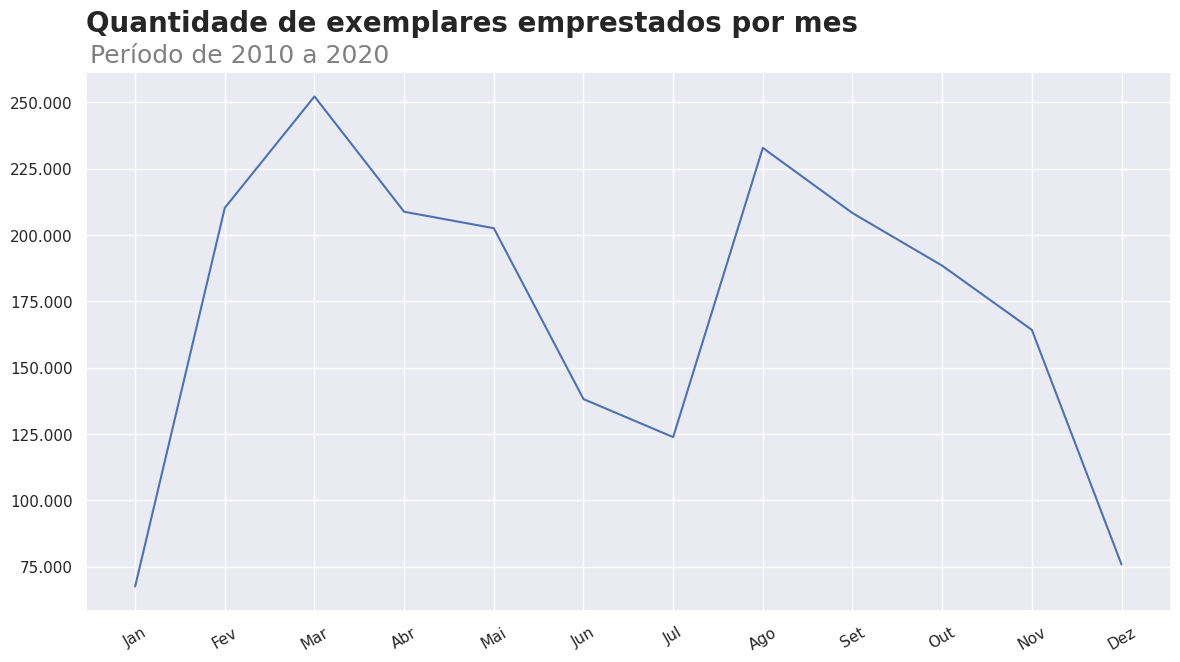

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.lineplot(emprestimos_mes, x= 'data_emprestimo', y= 'id_exemplar')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',','.')))
ax.set(xlabel=None,ylabel=None)
ax.tick_params(axis='x',rotation=30)
ax.set_title('Quantidade de exemplares emprestados por mes \n', size=20, fontweight= 'bold', loc= 'left')
ax.text(s='Período de 2010 a 2020',x=-0.5, y=265000, fontsize=18, ha='left',color='gray')

plt.show()

Os meses com maiores números de exemplares emprestados foram o de **março** e **agosto**.

### Quantidade de emprestimos por hora ao longo do dia

Novamente crio uma nova variavel copiando o dataframe `dados`

Em seguida faço a filtragem

In [18]:
emprestimos_horas = dados.copy()
emprestimos_horas['data_emprestimo'] = emprestimos_horas['data_emprestimo'].dt.hour
emprestimos_horas = emprestimos_horas.groupby('data_emprestimo')['id_exemplar'].count().to_frame()
emprestimos_horas

,id_exemplar
data_emprestimo,
0,17
6,14
7,18777
8,103416
9,131273
10,185839
11,180048
12,148754
13,126987


Ploto o grafico da tabela acima

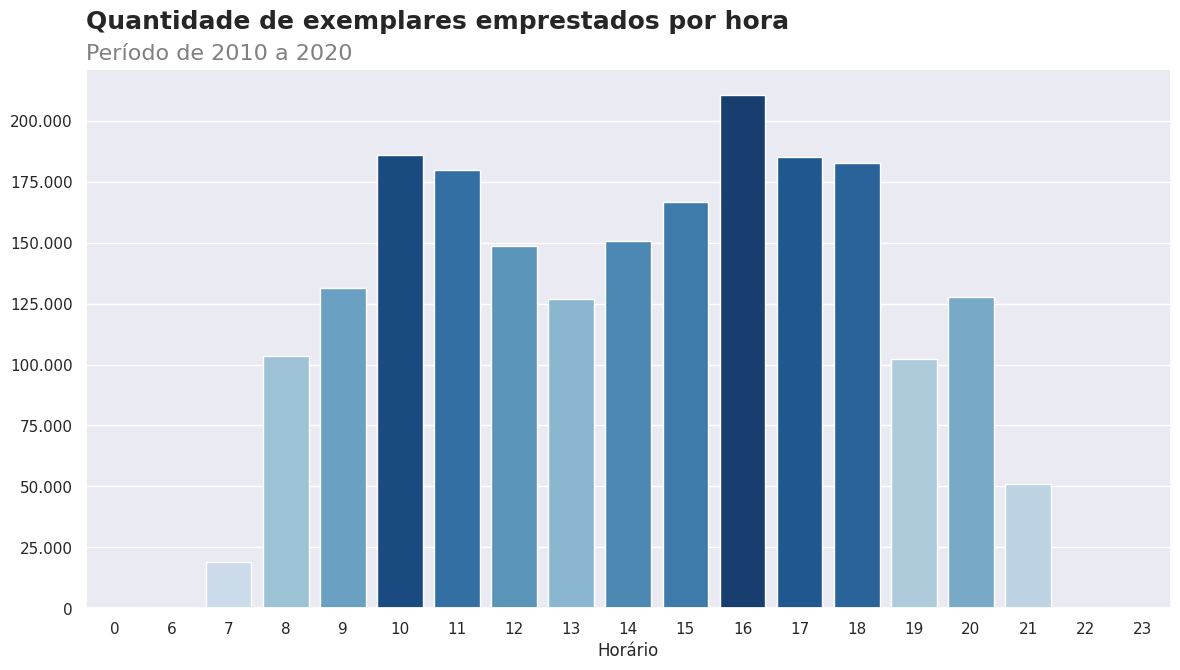

In [19]:
ax = sns.barplot(emprestimos_horas, x= emprestimos_horas.index, y= 'id_exemplar', palette='Blues', hue='id_exemplar', dodge=False)
plt.legend([],[], frameon=False)

ax.set(xlabel='Horário',ylabel=None)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',','.')))
plt.title('Quantidade de exemplares emprestados por hora', fontsize=18, y=1.06, fontweight= 'bold', loc= 'left')
ax.text(s='Período de 2010 a 2020',x=-0.5,y=225000,fontsize=16, ha='left',color='gray')
plt.show()

O gráfico nos mostra que os periodos das 10h e 16h são os de maior pico no atendimento de emprestimos, enquanto das 7h as 9h e as 19h e 22h são os de menos movimento para emprestimos.

# Dia 4 - Continuando a explorar os dados

---

In [20]:
dados.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,classe_geral
0,709684,L095049,NaT,2010-01-04 07:44:10.721,2010-01-05 16:26:12.662,2008023265.0,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências aplicadas
2,726965,L095049,2010-03-31 12:41:08.684,2010-03-01 12:40:56.212,2010-04-30 14:42:35.366,2009121584.0,ALUNO DE PÓS-GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências aplicadas
3,709685,L167050,NaT,2010-01-04 07:44:10.750,2010-01-12 07:34:13.934,2008023265.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas
5,717763,L167050,NaT,2010-02-11 11:16:30.335,2010-03-04 08:54:32.262,2008050352.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas
6,729996,L167050,2010-03-17 09:08:26.874,2010-03-04 13:36:26.599,2010-03-31 18:04:29.669,200722565.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas


## Criando a função

In [21]:
def frequencia(coluna):
    cols ={'quantidade': dados[coluna].value_counts(),
        'proporcao (%)': (dados[coluna].value_counts(normalize= True)*100).round(2)}

    return pd.DataFrame(data= cols)

### Verificando a frequencia por tipo de vinculo do usuario

In [22]:
frequencia('tipo_vinculo_usuario')

,quantidade,proporcao (%)
tipo_vinculo_usuario,,
ALUNO DE GRADUAÇÃO,1612324,77.80
ALUNO DE PÓS-GRADUAÇÃO,302541,14.60
DOCENTE,70981,3.42
SERVIDOR TÉCNICO-ADMINISTRATIVO,32184,1.55
ALUNO MÉDIO/TÉCNICO,28029,1.35
DOCENTE EXTERNO,23949,1.16
USUÁRIO EXTERNO,2509,0.12
OUTROS,5,0.00


O maior público da biblioteca são de fato os alunos de graduação com aproxidamente 78% o segundo maior público é o de pós graduação com aproximadamente 15%.

### Verificando a frequencia por coleção

In [23]:
frequencia('colecao')

,quantidade,proporcao (%)
colecao,,
Acervo Circulante,2053120,99.06
Multimeios,7954,0.38
Monografias,4021,0.19
Dissertações,2406,0.12
Obras de Referência,1954,0.09
Publicações de Autores do RN,866,0.04
Publicações da UFRN,764,0.04
Teses,714,0.03
Folhetos,271,0.01


A principal coleção é a própria circulante o que se cria um alerta, pois está com 99% de todos os exemplares empréstados.

### Verificando a frequencia por biblioteca

In [24]:
frequencia('biblioteca')

,quantidade,proporcao (%)
biblioteca,,
Biblioteca Central Zila Mamede,1426122,68.81
Biblioteca Setorial do Centro Ciências da Saúde - CCS,118614,5.72
Biblioteca Setorial da Faculdade de Ciências da Saúde do Trairi - FACISA - Santa Cruz,77609,3.74
Biblioteca Setorial Prof. Alberto Moreira Campos - ­Departamento de Odontologia,66447,3.21
Biblioteca Setorial Profª. Maria Lúcia da Costa Bezerra - ­CERES­ - Caicó,61478,2.97
Biblioteca Setorial Bertha Cruz Enders - ­Escola de Saúde da UFRN - ESUFRN,46040,2.22
"Biblioteca Setorial do Centro de Ciências Humanas, Letras e Artes - CCHLA",40744,1.97
Biblioteca Setorial Dr. Paulo Bezerra - EMCM/RN - Caicó,32097,1.55
Biblioteca Setorial Profª. Maria José Mamede Galvão - FELCS - Currais Novos,29089,1.40


Pelo tamanho da biblioteca central era de se esperar que houvesse uma maior predominância dela.

### Verificando a frequencia pelo CDU geral

In [25]:
frequencia('classe_geral')

,quantidade,proporcao (%)
classe_geral,,
Ciências aplicadas,1425473,68.78
Ciências sociais,369536,17.83
Matemática e ciências naturais,68744,3.32
Generalidades. Ciência e conhecimento,62521,3.02
Religião,62295,3.01
Filosofia e psicologia,60563,2.92
Geografia. Biografia. História,7989,0.39
Belas artes,7911,0.38
Linguagem. Língua. Linguística,7490,0.36


De maneira geral podemos observar que há uma grande diferença entre os temas.

# Dia 5 - Analisando empréstimos com boxplot

---

In [26]:
dados.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,classe_geral
0,709684,L095049,NaT,2010-01-04 07:44:10.721,2010-01-05 16:26:12.662,2008023265.0,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências aplicadas
2,726965,L095049,2010-03-31 12:41:08.684,2010-03-01 12:40:56.212,2010-04-30 14:42:35.366,2009121584.0,ALUNO DE PÓS-GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências aplicadas
3,709685,L167050,NaT,2010-01-04 07:44:10.750,2010-01-12 07:34:13.934,2008023265.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas
5,717763,L167050,NaT,2010-02-11 11:16:30.335,2010-03-04 08:54:32.262,2008050352.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas
6,729996,L167050,2010-03-17 09:08:26.874,2010-03-04 13:36:26.599,2010-03-31 18:04:29.669,200722565.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas


In [27]:
dados[dados['tipo_vinculo_usuario'] == 'ALUNO DE GRADUAÇÃO']['colecao'].value_counts().to_frame().head(1)

,count
colecao,
Acervo Circulante,1600155


In [28]:
dados[dados['tipo_vinculo_usuario'] == 'ALUNO DE PÓS-GRADUAÇÃO']['colecao'].value_counts().to_frame().head(1)

,count
colecao,
Acervo Circulante,299201


A coleção com a maior frequência de emprestimos dos alunos de graduação e pós-graduação é do Acervo Circulante

Crio uma nova variavel com colunas de anos e meses e filtro a coleção de maior frequência

In [29]:
dados_ano = dados.copy()
dados_ano['ano'] = dados['data_emprestimo'].dt.year
dados_ano['mes'] = dados['data_emprestimo'].dt.month
dados_ano['mes'] = dados_ano['mes'].replace(dicionario_meses)
dados_ano = dados_ano.query('colecao == "Acervo Circulante"')

### Distribuição dos empréstimos mensais realizados pelos alunos de graduação na coleção do acervo circulante

Criando a tabela com a quantidade mensal por ano

In [30]:
alunos_graduacao = dados_ano.query('tipo_vinculo_usuario == "ALUNO DE GRADUAÇÃO"')
alunos_graduacao = alunos_graduacao[['ano', 'mes']]
alunos_graduacao = alunos_graduacao.value_counts().to_frame('quantidade').reset_index()
alunos_graduacao

,ano,mes,quantidade
0,2012,Mar,22797
1,2015,Mar,22483
2,2013,Abr,21853
3,2017,Mar,21735
4,2016,Mar,21692
...,...,...,...
118,2016,Jan,2670
119,2019,Jan,2276
120,2019,Dez,1980
121,2020,Jan,1781


### Ploto o gráfico boxplot

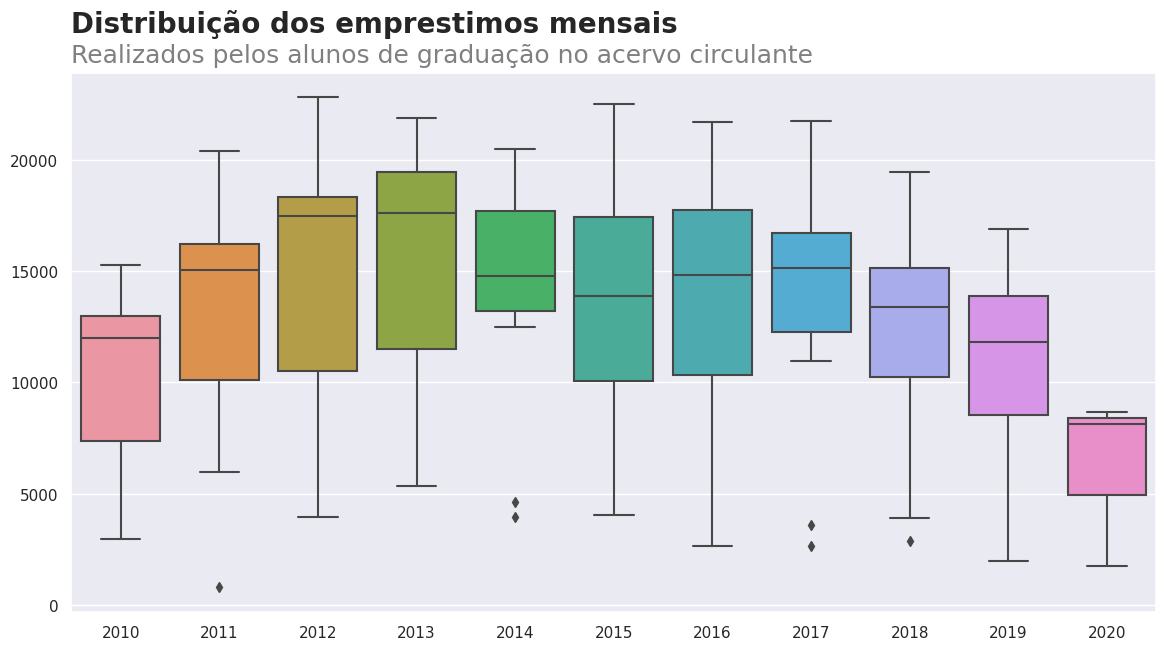

In [31]:
ax = sns.boxplot(data= alunos_graduacao, x='ano', y='quantidade')
ax.set_title('Distribuição dos emprestimos mensais'+'\n', loc= 'left', size=20, weight='bold')
ax.text(s='Realizados pelos alunos de graduação no acervo circulante', x= -0.5, y=max(alunos_graduacao['quantidade']*1.07), fontsize= 18, color= 'gray')
plt.xlabel('')
plt.ylabel('')
plt.show()

### Distribuição dos empréstimos mensais realizados pelos alunos de pós graduação na coleção do acervo circulante

Criando a tabela com a quantidade mensal por ano

In [32]:
alunos_pos_graduacao = dados_ano.query('tipo_vinculo_usuario == "ALUNO DE PÓS-GRADUAÇÃO"')
alunos_pos_graduacao = alunos_pos_graduacao[['ano', 'mes']]
alunos_pos_graduacao = alunos_pos_graduacao.value_counts().to_frame('quantidade').reset_index()
alunos_pos_graduacao.sort_values('ano')

,ano,mes,quantidade
31,2010,Mar,2919
120,2010,Jan,1105
117,2010,Dez,1275
114,2010,Fev,1474
113,2010,Jul,1522
...,...,...,...
76,2019,Set,2307
115,2020,Mar,1471
118,2020,Fev,1189
119,2020,Jan,1143


### Ploto o gráfico boxplot

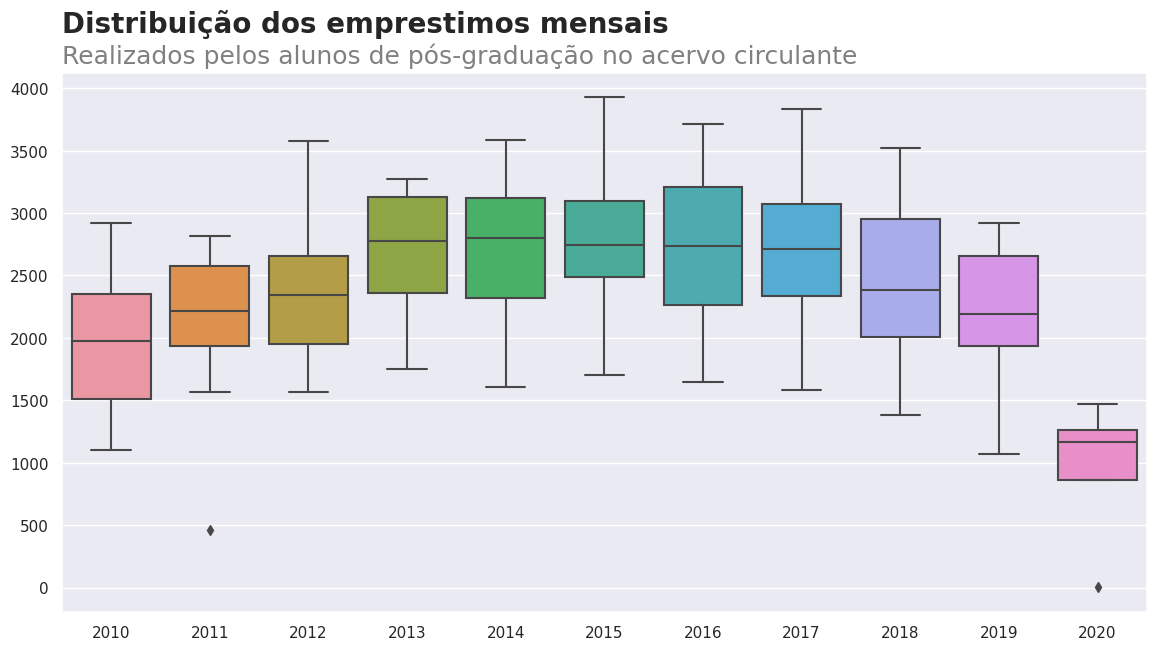

In [33]:
ax = sns.boxplot(data= alunos_pos_graduacao, x='ano', y='quantidade')
ax.set_title('Distribuição dos emprestimos mensais'+'\n', loc= 'left', size=20, weight='bold')
ax.text(s='Realizados pelos alunos de pós-graduação no acervo circulante', x= -0.5, y=max(alunos_pos_graduacao['quantidade']*1.07), fontsize= 18, color= 'gray')
plt.xlabel('')
plt.ylabel('')
plt.show()

# Dia 6: Novos dados, novas análises

---

## JSON

Faço a leitura da tabela

In [34]:
dados_usuarios_json = pd.read_json('https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/main/Dia_6-Novos_dados_novas_analises/Datasets/cadastro_alunos.json?utm_medium=email&_hsmi=270881120&_hsenc=p2ANqtz-_QlOtwlPJwIidHvRZJb_jZs-lVxz8otPDxHPPULWqVAW6Kko35aVf7oTWDAF7ttbxZK0_qD_4bcnM4DdaohElVQfLKeA&utm_content=270881120&utm_source=hs_automation')
dados_usuarios_json

,tipo_curso,registros
0,GRADUACAO,"[{""matricula_ou_siape"": ""2009029003.0"", ""tipo_..."
1,POSGRADUACAO,"[{""matricula_ou_siape"": ""2008112114.0"", ""tipo_..."


Modifico o formato de dados da coluna "matricula_ou_siape"

In [35]:
dados_usuarios_graduacao_json = pd.read_json(dados_usuarios_json['registros'][0])
dados_usuarios_graduacao_json['matricula_ou_siape'] = dados_usuarios_graduacao_json['matricula_ou_siape'].astype(float)
dados_usuarios_graduacao_json['matricula_ou_siape'] = dados_usuarios_graduacao_json['matricula_ou_siape'].astype(str)
dados_usuarios_graduacao_json

,matricula_ou_siape,tipo_vinculo_usuario,curso
0,2009029003.0,ALUNO DE GRADUAÇÃO,FILOSOFIA
1,200617346.0,ALUNO DE GRADUAÇÃO,DIREITO
2,200746502.0,ALUNO DE GRADUAÇÃO,ENGENHARIA DE PETRÓLEO
3,200504968.0,ALUNO DE GRADUAÇÃO,ADMINISTRAÇÃO
4,200615572.0,ALUNO DE GRADUAÇÃO,CIÊNCIA DA COMPUTAÇÃO
...,...,...,...
62797,20200012706.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
62798,20200039601.0,ALUNO DE GRADUAÇÃO,ENGENHARIA FLORESTAL
62799,20200132517.0,ALUNO DE GRADUAÇÃO,AGRONOMIA
62800,20200009344.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA


> Obs.: Os dados devem primeiro ser transformados para um tipo `float` e depois `str`. Caso contrario, alguns dados não corresponderam a nossa tabela futura

Verificando os dados

In [36]:
dados_usuarios_graduacao_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62802 entries, 0 to 62801
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   matricula_ou_siape    62802 non-null  object
 1   tipo_vinculo_usuario  62802 non-null  object
 2   curso                 62802 non-null  object
dtypes: object(3)
memory usage: 1.4+ MB


## Excel

Verifico quantas e quais sheets tem no arquivo

In [37]:
pd.ExcelFile('matricula_alunos.xlsx').sheet_names

['Até 2010', 'Após 2010']

Leio o arquivo excel da sheet **'Até 2010'**

In [38]:
dados_usuarios_ate2010_excel = pd.read_excel('matricula_alunos.xlsx', header= 1, names=['matricula_ou_siape', 'tipo_vinculo_usuario', 'curso'], sheet_name= 0)
dados_usuarios_ate2010_excel

,matricula_ou_siape,tipo_vinculo_usuario,curso
0,1.900017e+08,ALUNO DE GRADUAÇÃO,MATEMÁTICA
1,1.990145e+08,ALUNO DE GRADUAÇÃO,CIÊNCIAS BIOLÓGICAS
2,1.997357e+08,ALUNO DE GRADUAÇÃO,MATEMÁTICA
3,1.998124e+08,ALUNO DE GRADUAÇÃO,LETRAS
4,1.998237e+08,ALUNO DE GRADUAÇÃO,ECOLOGIA
...,...,...,...
7721,2.009075e+09,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
7722,2.009075e+09,ALUNO DE GRADUAÇÃO,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS
7723,2.009075e+09,ALUNO DE GRADUAÇÃO,ADMINISTRAÇÃO
7724,2.009075e+09,ALUNO DE GRADUAÇÃO,MÚSICA


Modifico o tipo de dados da coluna

In [39]:
dados_usuarios_ate2010_excel['matricula_ou_siape'] = dados_usuarios_ate2010_excel['matricula_ou_siape'].astype(str)
dados_usuarios_ate2010_excel

,matricula_ou_siape,tipo_vinculo_usuario,curso
0,190001688.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
1,199014489.0,ALUNO DE GRADUAÇÃO,CIÊNCIAS BIOLÓGICAS
2,199735674.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
3,199812431.0,ALUNO DE GRADUAÇÃO,LETRAS
4,199823670.0,ALUNO DE GRADUAÇÃO,ECOLOGIA
...,...,...,...
7721,2009075211.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
7722,2009075249.0,ALUNO DE GRADUAÇÃO,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS
7723,2009075294.0,ALUNO DE GRADUAÇÃO,ADMINISTRAÇÃO
7724,2009075300.0,ALUNO DE GRADUAÇÃO,MÚSICA


Verifico a modificação

In [40]:
dados_usuarios_ate2010_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7726 entries, 0 to 7725
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   matricula_ou_siape    7726 non-null   object
 1   tipo_vinculo_usuario  7726 non-null   object
 2   curso                 7726 non-null   object
dtypes: object(3)
memory usage: 181.2+ KB


Repito o mesmo processo para a sheet **'Após 2010'**

In [41]:
dados_usuarios_apos2010_excel = pd.read_excel('matricula_alunos.xlsx', header= 1, names=['matricula_ou_siape', 'tipo_vinculo_usuario', 'curso'], sheet_name= 1)
dados_usuarios_apos2010_excel['matricula_ou_siape'] = dados_usuarios_apos2010_excel['matricula_ou_siape'].astype(str)
dados_usuarios_apos2010_excel

,matricula_ou_siape,tipo_vinculo_usuario,curso
0,2010000017.0,ALUNO DE GRADUAÇÃO,DIREITO
1,2010000035.0,ALUNO DE GRADUAÇÃO,AGRONOMIA
2,2010001290.0,ALUNO DE GRADUAÇÃO,ENGENHARIA QUÍMICA
3,2010002849.0,ALUNO DE GRADUAÇÃO,ENGENHARIA AMBIENTAL
4,2010003381.0,ALUNO DE GRADUAÇÃO,GEOGRAFIA
...,...,...,...
2269,20150116770.0,ALUNO DE GRADUAÇÃO,LETRAS
2270,2015074523.0,ALUNO DE GRADUAÇÃO,DANÇA
2271,20160002745.0,ALUNO DE GRADUAÇÃO,ENGENHARIA DA COMPUTAÇÃO
2272,20170086533.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA


In [42]:
dados_usuarios_apos2010_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2274 entries, 0 to 2273
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   matricula_ou_siape    2274 non-null   object
 1   tipo_vinculo_usuario  2274 non-null   object
 2   curso                 2274 non-null   object
dtypes: object(3)
memory usage: 53.4+ KB


Concatenando os dataframes do Excel

In [43]:
dados_usuarios_excel = pd.concat([dados_usuarios_ate2010_excel, dados_usuarios_apos2010_excel])
dados_usuarios_excel

,matricula_ou_siape,tipo_vinculo_usuario,curso
0,190001688.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
1,199014489.0,ALUNO DE GRADUAÇÃO,CIÊNCIAS BIOLÓGICAS
2,199735674.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
3,199812431.0,ALUNO DE GRADUAÇÃO,LETRAS
4,199823670.0,ALUNO DE GRADUAÇÃO,ECOLOGIA
...,...,...,...
2269,20150116770.0,ALUNO DE GRADUAÇÃO,LETRAS
2270,2015074523.0,ALUNO DE GRADUAÇÃO,DANÇA
2271,20160002745.0,ALUNO DE GRADUAÇÃO,ENGENHARIA DA COMPUTAÇÃO
2272,20170086533.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA


## Concatenando os dataframes JSON e Excel

In [44]:
dados_usuarios = pd.concat([dados_usuarios_excel, dados_usuarios_graduacao_json])
dados_usuarios.reset_index(drop= True, inplace= True)

dados_usuarios.head()

,matricula_ou_siape,tipo_vinculo_usuario,curso
0,190001688.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
1,199014489.0,ALUNO DE GRADUAÇÃO,CIÊNCIAS BIOLÓGICAS
2,199735674.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
3,199812431.0,ALUNO DE GRADUAÇÃO,LETRAS
4,199823670.0,ALUNO DE GRADUAÇÃO,ECOLOGIA


Verificando os dados

In [45]:
dados_usuarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72802 entries, 0 to 72801
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   matricula_ou_siape    72802 non-null  object
 1   tipo_vinculo_usuario  72802 non-null  object
 2   curso                 72802 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


## Filtrando os cursos

Em uma nova tabela, seleciono apenas os cursos que passarão por avaliação

In [67]:
dados_usuarios_avaliacao = dados_usuarios.query("curso == ['BIBLIOTECONOMIA', 'CIÊNCIAS SOCIAIS', 'COMUNICAÇÃO SOCIAL', 'DIREITO', 'FILOSOFIA', 'PEDAGOGIA']")
dados_usuarios_avaliacao

,matricula_ou_siape,tipo_vinculo_usuario,curso
8,200031011.0,ALUNO DE GRADUAÇÃO,DIREITO
9,200045080.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
15,200115053.0,ALUNO DE GRADUAÇÃO,CIÊNCIAS SOCIAIS
18,200123382.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
19,200123730.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
...,...,...,...
72789,20200097481.0,ALUNO DE GRADUAÇÃO,PEDAGOGIA
72796,20200107087.0,ALUNO DE GRADUAÇÃO,PEDAGOGIA
72797,20200012706.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
72800,20200009344.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA


## Criando uma nova tabela

Primeiro crio uma nova tabela apenas com a coluna `'ano'` e `'matricula_ou_siape'` e com os filtros necessario

In [64]:
dados_matricula_ano = dados.copy()
dados_matricula_ano = dados_matricula_ano.query('tipo_vinculo_usuario == "ALUNO DE GRADUAÇÃO"')
dados_matricula_ano['ano'] = dados_matricula_ano['data_emprestimo'].dt.year
dados_matricula_ano = dados_matricula_ano.query('ano >= 2015')
dados_matricula_ano.reset_index(drop= True, inplace= True)
dados_matricula_ano = dados_matricula_ano[['ano', 'matricula_ou_siape']]
dados_matricula_ano

,ano,matricula_ou_siape
0,2015,2014083920.0
1,2015,2014083949.0
2,2015,2014083920.0
3,2015,2014083920.0
4,2015,2014084089.0
...,...,...
788099,2020,20160144295.0
788100,2020,20150109837.0
788101,2020,20190035012.0
788102,2020,20150129867.0


Verifico e removo os NaN

In [65]:
dados_matricula_ano.isna().sum()

ano                   0
matricula_ou_siape    0
dtype: int64

In [66]:
dados_matricula_ano.dropna(inplace=True)

## Unificando as tabelas

Faço a unificação com o merge, usando seus parâmetros padrões

In [68]:
dados_avaliacao = dados_matricula_ano.merge(dados_usuarios_avaliacao)
dados_avaliacao

,ano,matricula_ou_siape,tipo_vinculo_usuario,curso
0,2018,20180154181.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
1,2020,20180154181.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
2,2018,20180154181.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
3,2018,20180154181.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
4,2018,20180154181.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
...,...,...,...,...
212833,2020,20200023906.0,ALUNO DE GRADUAÇÃO,CIÊNCIAS SOCIAIS
212834,2020,20190121101.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
212835,2020,20200144278.0,ALUNO DE GRADUAÇÃO,PEDAGOGIA
212836,2020,20190067212.0,ALUNO DE GRADUAÇÃO,CIÊNCIAS SOCIAIS


Crio uma nova tabela contando seus valores

In [69]:
dados_avaliacao_final = dados_avaliacao[['ano', 'curso']].value_counts().reset_index()
dados_avaliacao_final

,ano,curso,count
0,2017,COMUNICAÇÃO SOCIAL,8253
1,2016,COMUNICAÇÃO SOCIAL,7973
2,2017,DIREITO,7885
3,2015,BIBLIOTECONOMIA,7784
4,2015,DIREITO,7665
5,2016,FILOSOFIA,7576
6,2015,CIÊNCIAS SOCIAIS,7489
7,2017,PEDAGOGIA,7434
8,2017,FILOSOFIA,7389
9,2016,DIREITO,7363


## Pivotando a tabela

Por fim, faço a tabela pivot com a soma de linhas e colunas

In [70]:
dados_avaliacao_final_pivot = dados_avaliacao_final.pivot_table(index = 'curso', columns= 'ano', values= 'count', aggfunc=sum, margins= True, margins_name='TOTAL')
dados_avaliacao_final_pivot

ano,2015,2016,2017,2018,2019,2020,TOTAL
curso,,,,,,,
BIBLIOTECONOMIA,7784,7044,7307,6378,5889,900,35302
CIÊNCIAS SOCIAIS,7489,6978,6918,6181,5788,825,34179
COMUNICAÇÃO SOCIAL,7147,7973,8253,6953,5885,796,37007
DIREITO,7665,7363,7885,7027,5861,905,36706
FILOSOFIA,6950,7576,7389,6296,5572,832,34615
PEDAGOGIA,7189,7153,7434,6518,5869,866,35029
TOTAL,44224,44087,45186,39353,34864,5124,212838


# Dia 7: Customização de tabelas

---

Crio uma nova tabela e faço a filtragem

In [71]:
dados_html = dados.copy()
dados_html = dados_html.query('data_emprestimo >= 2017')
dados_html = dados_html[['matricula_ou_siape', 'id_emprestimo', 'data_emprestimo']]
dados_html.reset_index(drop=True, inplace= True)
dados_html.head()

,matricula_ou_siape,id_emprestimo,data_emprestimo
0,2013043297.0,9473712,2017-02-16 16:39:45.480
1,20171029059.0,9610280,2017-03-28 09:04:09.781
2,2013043297.0,9695152,2017-04-24 20:01:50.300
3,2016008166.0,9857104,2017-06-19 19:59:41.522
4,20170083498.0,9899396,2017-07-24 08:40:48.277


Coleto os dados de alunos de pós-graduação

In [72]:
dados_usuarios_json = pd.read_json('https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/main/Dia_6-Novos_dados_novas_analises/Datasets/cadastro_alunos.json?utm_medium=email&_hsmi=270881120&_hsenc=p2ANqtz-_QlOtwlPJwIidHvRZJb_jZs-lVxz8otPDxHPPULWqVAW6Kko35aVf7oTWDAF7ttbxZK0_qD_4bcnM4DdaohElVQfLKeA&utm_content=270881120&utm_source=hs_automation')
dados_usuarios_posgraduacao_json = pd.read_json(dados_usuarios_json['registros'][1])
dados_usuarios_posgraduacao_json['matricula_ou_siape'] = dados_usuarios_posgraduacao_json['matricula_ou_siape'].astype(float)
dados_usuarios_posgraduacao_json['matricula_ou_siape'] = dados_usuarios_posgraduacao_json['matricula_ou_siape'].astype(str)
dados_usuarios_posgraduacao_json

,matricula_ou_siape,tipo_vinculo_usuario,curso
0,2008112114.0,ALUNO DE PÓS-GRADUAÇÃO,CIÊNCIAS ODONTOLÓGICAS
1,2008106583.0,ALUNO DE PÓS-GRADUAÇÃO,ENGENHARIA DE SOFTWARE
2,2011101417.0,ALUNO DE PÓS-GRADUAÇÃO,ARQUITETURA E URBANISMO
3,2011113122.0,ALUNO DE PÓS-GRADUAÇÃO,FILOSOFIA
4,2010110903.0,ALUNO DE PÓS-GRADUAÇÃO,ARTES CÊNICAS
...,...,...,...
19435,20201013501.0,ALUNO DE PÓS-GRADUAÇÃO,GESTÃO DA INFORMAÇÃO E DO CONHECIMENTO
19436,20201014062.0,ALUNO DE PÓS-GRADUAÇÃO,"CIÊNCIA, TECNOLOGIA E INOVAÇÃO"
19437,20201017690.0,ALUNO DE PÓS-GRADUAÇÃO,CIÊNCIAS DA SAÚDE
19438,20201014465.0,ALUNO DE PÓS-GRADUAÇÃO,DESIGN


## Junção de DataFrames de cadastro de usuários e de empréstimos

Faço a união com o merge usando os parâmetros padrões

In [73]:
dados_html = dados_html.merge(dados_usuarios_posgraduacao_json)
dados_html['data_emprestimo'] = dados_html['data_emprestimo'].dt.year
dados_html

,matricula_ou_siape,id_emprestimo,data_emprestimo,tipo_vinculo_usuario,curso
0,20171029059.0,9610280,2017,ALUNO DE PÓS-GRADUAÇÃO,FILOSOFIA
1,20171029059.0,9738188,2017,ALUNO DE PÓS-GRADUAÇÃO,FILOSOFIA
2,20171029059.0,9836236,2017,ALUNO DE PÓS-GRADUAÇÃO,FILOSOFIA
3,20171029059.0,2617807,2018,ALUNO DE PÓS-GRADUAÇÃO,FILOSOFIA
4,20171029059.0,2717949,2018,ALUNO DE PÓS-GRADUAÇÃO,FILOSOFIA
...,...,...,...,...,...
92057,20201006310.0,2985961,2020,ALUNO DE PÓS-GRADUAÇÃO,ARQUITETURA E URBANISMO
92058,20201006310.0,2985962,2020,ALUNO DE PÓS-GRADUAÇÃO,ARQUITETURA E URBANISMO
92059,20191006490.0,2986123,2020,ALUNO DE PÓS-GRADUAÇÃO,ARQUITETURA E URBANISMO
92060,20201011795.0,2987279,2020,ALUNO DE PÓS-GRADUAÇÃO,GESTÃO DA INFORMAÇÃO E DO CONHECIMENTO


## Criando a tabela pivot

Primeiro conto os valores de empréstimos

In [74]:
dados_html = dados_html[['data_emprestimo','curso']].value_counts().reset_index()
dados_html

,data_emprestimo,curso,count
0,2018,CIÊNCIAS ODONTOLÓGICAS,2540
1,2017,ADMINISTRAÇÃO,2538
2,2017,ENGENHARIA DE SOFTWARE,2477
3,2017,CIÊNCIAS DA SAÚDE,2434
4,2017,"CIÊNCIA, TECNOLOGIA E INOVAÇÃO",2415
5,2017,CIÊNCIAS ODONTOLÓGICAS,2414
6,2017,ENGENHARIA CIVIL,2399
7,2018,"CIÊNCIA, TECNOLOGIA E INOVAÇÃO",2365
8,2017,CIÊNCIA E ENGENHARIA DE MATERIAIS,2316
9,2018,ADMINISTRAÇÃO,2316


Faço a tabela pivot

In [75]:
dados_html_pivot = pd.pivot_table(dados_html, index= 'curso', columns= 'data_emprestimo', values= 'count')
dados_html_pivot

data_emprestimo,2017,2018,2019,2020
curso,,,,
ADMINISTRAÇÃO,2538,2316,1692,269
ARQUITETURA E URBANISMO,2209,1917,1818,257
ARTES CÊNICAS,2115,2082,1812,229
BIOINFORMÁTICA,2190,1914,1825,263
BIOQUÍMICA,2294,1944,2057,272
CIÊNCIA E ENGENHARIA DE MATERIAIS,2316,2110,2008,328
"CIÊNCIA, TECNOLOGIA E INOVAÇÃO",2415,2365,2026,303
CIÊNCIAS DA SAÚDE,2434,1986,1825,234
CIÊNCIAS ODONTOLÓGICAS,2414,2540,2134,352


Leio a tabela de previsões

In [76]:
previsao_emprestimos_19a22 = pd.read_csv('https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/main/Dia_7-Apresentando_resultados_em_HTML/Dataset/previsao', sep= ' ')
previsao_emprestimos_19a22

,curso,previsao_2022
0,administracao,1905
1,arquitetura_e_urbanismo,1896
2,artes_cenicas,1920
3,bioinformatica,2302
4,bioquimica,2090
5,ciencia_e_engenharia_de_materiais,2010
6,ciencia_tecnologia_e_inovacao,1960
7,ciencias_da_saude,1730
8,ciencias_odontologicas,2405
9,design,1900


Faço o tratamento e incluo na tabela pivot

In [77]:
previsao_emprestimos_19a22.index = dados_html_pivot.index
dados_html_pivot[2022] = previsao_emprestimos_19a22['previsao_2022']
dados_html_pivot.drop(2020, axis= 1, inplace= True)
dados_html_pivot

data_emprestimo,2017,2018,2019,2022
curso,,,,
ADMINISTRAÇÃO,2538,2316,1692,1905
ARQUITETURA E URBANISMO,2209,1917,1818,1896
ARTES CÊNICAS,2115,2082,1812,1920
BIOINFORMÁTICA,2190,1914,1825,2302
BIOQUÍMICA,2294,1944,2057,2090
CIÊNCIA E ENGENHARIA DE MATERIAIS,2316,2110,2008,2010
"CIÊNCIA, TECNOLOGIA E INOVAÇÃO",2415,2365,2026,1960
CIÊNCIAS DA SAÚDE,2434,1986,1825,1730
CIÊNCIAS ODONTOLÓGICAS,2414,2540,2134,2405


## Modificando os valores para diferenças percentuais

Com a tabela pivot, altero seus valores para a diferença percentual e altero a coluna do ano de 2017 para seu valor original

Assim, não ficaremos com valores NaN

In [78]:
dados_html_pivot_pct = round(dados_html_pivot.pct_change(axis= 1)* 100, 2)
dados_html_pivot_pct[2017].fillna(dados_html_pivot[2017], inplace= True)
dados_html_pivot_pct.index = dados_html_pivot_pct.index.str.capitalize()
dados_html_pivot_pct.reset_index(inplace= True)
dados_html_pivot_pct

data_emprestimo,curso,2017,2018,2019,2022
0,Administração,2538.0,-8.75,-26.94,12.59
1,Arquitetura e urbanismo,2209.0,-13.22,-5.16,4.29
2,Artes cênicas,2115.0,-1.56,-12.97,5.96
3,Bioinformática,2190.0,-12.60,-4.65,26.14
4,Bioquímica,2294.0,-15.26,5.81,1.60
5,Ciência e engenharia de materiais,2316.0,-8.89,-4.83,0.10
6,"Ciência, tecnologia e inovação",2415.0,-2.07,-14.33,-3.26
7,Ciências da saúde,2434.0,-18.41,-8.11,-5.21
8,Ciências odontológicas,2414.0,5.22,-15.98,12.70
9,Design,2272.0,-19.10,0.16,3.20


## Estilizando a tabela

Faço a estilização da tabela utilizando o método `style`

Formato os valores de porcentagem, colocando "%" em cada célula e alterando suas cores de acordo com os valores positivos e negativos

Por fim, escondo seu index

In [80]:
estilo_html = dados_html_pivot_pct.style
estilo_html.format('{:.2f}%', subset=[2018, 2019, 2022])
estilo_html.format('{:.0f}', subset=[2017], precision= None)
estilo_html.text_gradient(cmap='RdYlGn',low=1, axis=1,vmax=0.1,vmin=0, subset=[2018,2019,2022])
estilo_html.hide(axis= 'index')

curso,2017,2018,2019,2022
Administração,2538,-8.75%,-26.94%,12.59%
Arquitetura e urbanismo,2209,-13.22%,-5.16%,4.29%
Artes cênicas,2115,-1.56%,-12.97%,5.96%
Bioinformática,2190,-12.60%,-4.65%,26.14%
Bioquímica,2294,-15.26%,5.81%,1.60%
Ciência e engenharia de materiais,2316,-8.89%,-4.83%,0.10%
"Ciência, tecnologia e inovação",2415,-2.07%,-14.33%,-3.26%
Ciências da saúde,2434,-18.41%,-8.11%,-5.21%
Ciências odontológicas,2414,5.22%,-15.98%,12.70%
Design,2272,-19.10%,0.16%,3.20%


Para concluir o desafio #7DaysOfCode salvo a tabela em HTML

In [81]:
estilo_html.to_html('diff_pct_anos.html', sparse_index= False)